In [3]:
include("./QuantumIsing.jl")

Main.QuantumIsing

In [13]:
using .QuantumIsing
using LaTeXStrings
using Plots
pyplot()

Plots.PyPlotBackend()

## The intended phase diagram
The Hamiltonian we considered is $$H = \sum_{j}\sigma^{z}_{i}\sigma^{z}_{i+1}-h_x\sum_{i}\sigma_{i}^{x}-h_z\sum_{i}\sigma_{i}^{z}.$$ This initial state of the system is antiferromagnetic, as we probe the system by varying $h_x$ and $h_z$, the system will process a phase transition to paramagnetic state. The phase diagram is as following. On the critical line, the system is gapless.

 49.545320 seconds (80.55 M allocations: 85.234 GiB, 13.11% gc time)


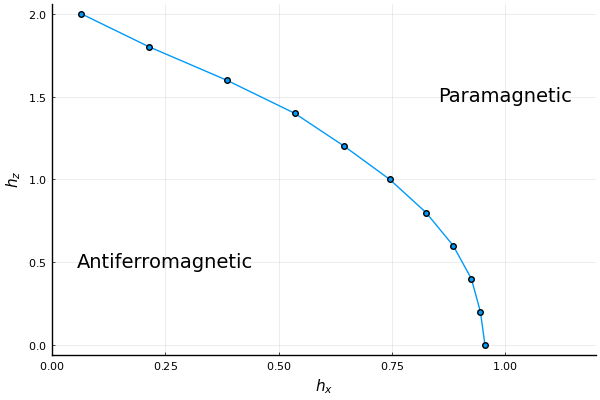

In [18]:
p1 = plot(xlab=L"$h_x$", ylab=L"$h_z$", xlim=(0,1.2), legend=false);
annotate!((0.25, 0.5, "Antiferromagnetic"));
annotate!(1.00, 1.5, "Paramagnetic");
hxs = 0.06:0.01:1.2;
hzs = 0:0.2:2;
hx_lst = zeros(length(hzs))

@time for (i, hz) in enumerate(hzs)
    for j in 1:1:length(hxs)-1
        m1, m2 = critical_line(N=10, hx=hxs[j], hz=hz) 
        m1prime, m2prime = critical_line(N=10, hx=hxs[j+1],hz=hz)
        if m2prime > m2
            hx = (hxs[j+1]+hxs[j])/2
            # println(hx," ",hz)
            hx_lst[i] = hx
            break
        end
    end
end
plot!(p1, hx_lst, hzs, marker=:circle);
p1


## Clarifications of the phase diagram
The phase diagram listed above can be verified by considering 1st/2nd order derivatives of z-directional average magnetization. We notice here that when $hx<<1$ (i.e., the multicritical point), the system undergoes a first-order phase transition as $hz$ approaches 2 as shown in the following diagram in which we take $hx$ as 0.1.

 11.381260 seconds (5.30 M allocations: 31.392 GiB, 12.68% gc time)


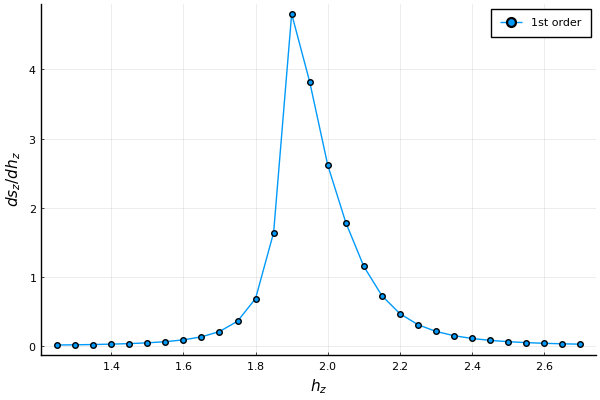

In [19]:
hs1 = 1.25:0.05:2.75;
p2 = plot(xlab=L"$h_z$", ylab=L"$ds_z/dh_z$");
M1 = zeros(length(hs1));
@time for (i, h) in enumerate(hs1)
    vals, vecs = generate_eigs(N=14, hx=0.1, hz=h)
    groundstate = @view vecs[:,1]
    M1[i] = magnetization(groundstate, z=true)
    # println(M)
end

h, deri = derivative(x=hs1, y=M1);
plot!(p2, h, deri, marker=:circle, label="1st order");
p2

<hr style="border:1.5px solid gray"> </hr>
In the middle area (i.e., $0<hx<1$), the first order derivative cannot appropriately detect the phase transtion point, which indicates that in middle area the system undergoes second order phase transition. As we can see in the following diagrams in which we take $hx=0.5$.

  7.578109 seconds (3.59 M allocations: 21.266 GiB, 12.30% gc time)


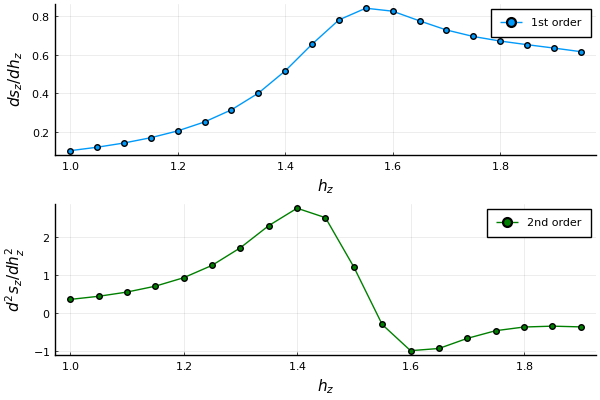

In [22]:
hs2 = 1:0.05:2
p2 = plot(layout=grid(2,1, heights=[0.5,0.5]), xlab=L"$h_z$")
M2 = zeros(length(hs2))

@time for (i, h) in enumerate(hs2)
    vals, vecs = generate_eigs(N=14, hx=0.5, hz=h)
    groundstate = @view vecs[:,1]
    M2[i] = magnetization(groundstate, z=true)
    # println(M)
end

# Taking the first derivative
h, deri = derivative(x=hs2, y=M2);
# Taking the second derivative
h1, deri1 = derivative(x=h, y=deri)

plot!(p2[1], h, deri, marker=:circle, label="1st order", ylab=L"$ds_z/dh_z$");
plot!(p2[2], h1, deri1, marker=:circle, label="2nd order", ylab=L"$d^{2}s_z/dh_{z}^{2}$", color=:green);

p2

<hr style="border:1.5px solid gray"> </hr>
When $hz$ approaching 0, again the system undergoes a second-order phase transition, as we can see in the following diagrams. We expect such phase transition happens at around $h_x=1$.

In [ ]:
hs3 = 0.5:0.05:1.5
p3 = plot(layout=grid(2,1, heights=[0.5,0.5]), xlab=L"$h_x$")
M3 = zeros(length(hs3))

@time for (i, h) in enumerate(hs3)
    vals, vecs = generate_eigs(N=16, hx=h, hz=0)
    groundstate = @view vecs[:,1]
    M3[i] = magnetization(groundstate, z=false)
    # println(M)
end

# Taking the first derivative
h, deri = derivative(x=hs3, y=M3);
# Taking the second derivative
h1, deri1 = derivative(x=h, y=deri)

plot!(p3[1], h, deri, marker=:circle, label="1st order", ylab=L"$ds_x/dh_x$");
plot!(p3[2], h1, deri1, marker=:circle, label="2nd order", ylab=L"d^2s_x/dh_x^2", color=:green);

p3